<font size="6">Load and check the data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Symptom2Disease.csv', encoding='latin-1')

In [3]:
data

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...,...
1195,295,diabetes,I'm shaking and trembling all over. I've lost ...
1196,296,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,297,diabetes,I regularly experience these intense urges and...
1198,298,diabetes,"I have trouble breathing, especially outside. ..."


In [4]:
len(data)

1200

In [5]:
np.unique(data['label'])

array(['Acne', 'Arthritis', 'Bronchial Asthma', 'Cervical spondylosis',
       'Chicken pox', 'Common Cold', 'Dengue', 'Dimorphic Hemorrhoids',
       'Fungal infection', 'Hypertension', 'Impetigo', 'Jaundice',
       'Malaria', 'Migraine', 'Pneumonia', 'Psoriasis', 'Typhoid',
       'Varicose Veins', 'allergy', 'diabetes', 'drug reaction',
       'gastroesophageal reflux disease', 'peptic ulcer disease',
       'urinary tract infection'], dtype=object)

In [6]:
len(np.unique(data['label']))

24

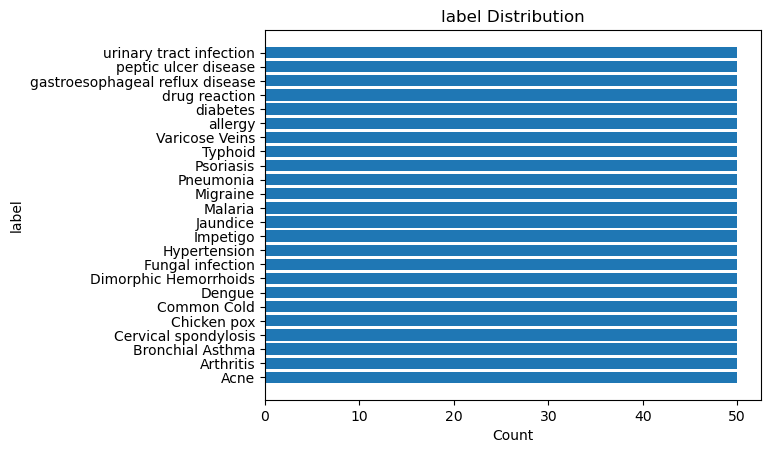

In [7]:
labels = data['label']
label_counts = labels.value_counts().sort_index()
plt.barh(label_counts.index,label_counts.values)
plt.xlabel('Count')
plt.ylabel('label')
plt.title('label Distribution', fontsize=12)
plt.show()

<font size="6">Text Preprocessing</font>

In [8]:
import string
import nltk
import re
from nltk.corpus import stopwords
def clean_text(text):
    #remove the specified symbols and replaced by space
    text=re.sub("\[.*#&]"," ",text)
    #Punctuation removal
    words = text.lower().split()
    words = [word.lower().translate(str.maketrans('', '', string.punctuation)) for word in words]
    
    #Stopword removal
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    
    #Joining the text
    processed_text = ' '.join(words)
    return processed_text

In [9]:
data['text'].apply(clean_text)

0       experiencing skin rash arms legs torso past we...
1       skin peeling especially knees elbows scalp pee...
2       experiencing joint pain fingers wrists knees p...
3       silver like dusting skin especially lower back...
4       nails small dents pits often feel inflammatory...
                              ...                        
1195    im shaking trembling ive lost sense taste smel...
1196    particularly crevices skin skin rashes irritat...
1197    regularly experience intense urges want urinat...
1198    trouble breathing especially outside start fee...
1199    constantly sneeze dry cough infections dont se...
Name: text, Length: 1200, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = data['text']
y = le.fit_transform(data['label'])
#80% of training data and 20% of testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<font size="6">Methods</font>

In [11]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)

Wall time: 20.6 ms


<font size="4">1 Baseline-Multinomial Naive bayes</font>

In [12]:
%%time
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_vector, y_train)
y_pred = naive_bayes_model.predict(X_test_vector)
print('Classification Report for Multinomial NB: \n', classification_report(y_test, y_pred))

Classification Report for Multinomial NB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       0.70      1.00      0.82         7
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        12
           6       1.00      0.83      0.91        12
           7       0.78      1.00      0.88         7
           8       1.00      1.00      1.00        13
           9       1.00      0.90      0.95        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        11
          12       0.79      1.00      0.88        11
          13       1.00      0.90      0.95        10
          14       1.00      1.00      1.00        11
          15       0.71      0.83      0.77         6
          16       0.89      0.89    

In [13]:
from sklearn.metrics import mean_squared_error
print('mean squared error:',mean_squared_error(y_test, y_pred))

mean squared error: 5.129166666666666


<font size="4">2  XGBClassifier</font>

In [14]:
%%time
from xgboost import XGBClassifier
XGBClassifier_model = XGBClassifier(n_estimators=2000, learning_rate=0.25, max_depth=4, colsample_bytree=0.3, n_jobs=-1, random_state=40)
XGBClassifier_model.fit(X_train_vector, y_train)
y_pred = XGBClassifier_model.predict(X_test_vector)
print('Classification Report for XGBClassifier: \n', classification_report(y_test, y_pred))

Classification Report for XGBClassifier: 
               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11
           3       1.00      0.86      0.92         7
           4       0.69      0.75      0.72        12
           5       0.86      1.00      0.92        12
           6       0.86      0.50      0.63        12
           7       1.00      1.00      1.00         7
           8       0.93      1.00      0.96        13
           9       1.00      1.00      1.00        10
          10       1.00      0.91      0.95        11
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        11
          13       0.90      0.90      0.90        10
          14       1.00      1.00      1.00        11
          15       0.71      0.83      0.77         6
          16       0.82      1.00     

<font size="4">3  RandomForestClassifier</font>

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier
RandomForest_model = RandomForestClassifier()
RandomForest_model.fit(X_train_vector, y_train)
y_pred = RandomForest_model.predict(X_test_vector)
print('Classification Report for RandomForest: \n', classification_report(y_test, y_pred))

Classification Report for RandomForest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      1.00      0.95        10
           2       1.00      1.00      1.00        11
           3       0.88      1.00      0.93         7
           4       0.83      0.83      0.83        12
           5       1.00      1.00      1.00        12
           6       1.00      0.58      0.74        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        11
          15       1.00      0.83      0.91         6
          16       0.82      1.00      

<font size="4">4 Neural Network</font>

In [34]:
%%time
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
X_train_vector1=tokenizer.texts_to_sequences(X_train)
X_train_vector=pad_sequences(X_train_vector1, maxlen=50,padding="post")
X_test_vector1=tokenizer.texts_to_sequences(X_test)
X_test_vector=pad_sequences(X_test_vector1, padding="post")

Wall time: 42.2 ms


In [35]:
%%time
# build the model with layers
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=len(X_train_vector[0])),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(24, activation="softmax")
])

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 128)           256000    
                                                                 
 global_average_pooling1d_3   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_8 (Dense)             (None, 16)                2064      
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 24)                792       
                                                                 
Total params: 259,400
Trainable params: 259,400
Non-trainable params: 0
________________________________________________

In [36]:
%%time
history=model.fit(X_train_vector, y_train, epochs=30,verbose=0,validation_data=(X_test_vector, y_test))

Wall time: 2.51 s


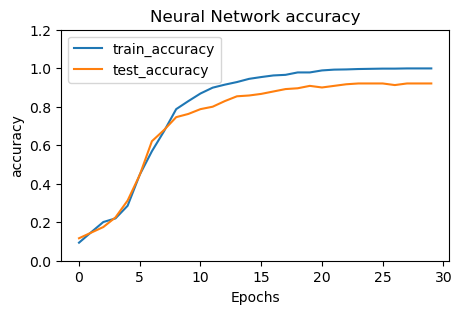

In [37]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.ylim(0, 1.2)
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.title('Neural Network accuracy')
plt.show()

In [20]:
%%time
model.evaluate(X_test_vector, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 0.3491 - accuracy: 0.8958
Wall time: 51 ms


[0.3490694761276245, 0.8958333134651184]

<font size="4">5 Convolutional Neural Network</font>

In [58]:
# build the model with convolutional layer, be careful with overfitting
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(2000, 128, input_length=len(X_train_vector[0])),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(24, activation='softmax')])
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 50, 128)           256000    
                                                                 
 dropout_15 (Dropout)        (None, 50, 128)           0         
                                                                 
 conv1d_5 (Conv1D)           (None, 46, 128)           82048     
                                                                 
 global_average_pooling1d_8   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                4128      
                                                      

In [59]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [60]:
%%time
history=model2.fit(X_train_vector, y_train, epochs=30,verbose=0,validation_data=(X_test_vector, y_test))

Wall time: 7.55 s


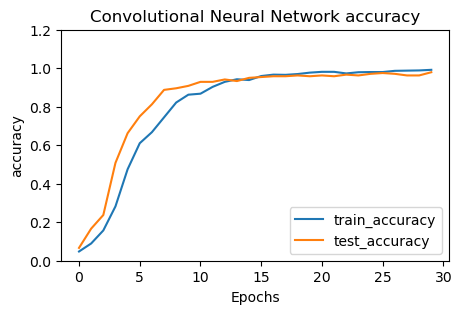

In [61]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
plt.ylim(0, 1.2)
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['train_accuracy', 'test_accuracy'])
plt.title('Convolutional Neural Network accuracy')
plt.show()

In [62]:
%%time
model2.evaluate(X_test_vector, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.1005 - accuracy: 0.9792
Wall time: 70.3 ms


[0.10049834102392197, 0.9791666865348816]